## Loading the Data 

In [1]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

data= pd.read_csv(r'exam_score.csv',header=None)
data.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


##  Splitting the data into train and test

In [2]:
X_train,X_test,y_train,y_test=train_test_split(data[[0,1]],data[[2]].astype(int),
                                               test_size=0.3,random_state=1,stratify=data[[2]].astype(int))

## Fitting a linear model

In [3]:

linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)


LinearRegression()

In [4]:
### We can see from the results that the predicion from linear regression ranges from -ve to +ve
### values however we need only 0 and 1

linear.predict(X_test) ## Predicted Values

array([[ 1.22083091],
       [ 1.17230948],
       [ 0.94507443],
       [ 0.35609403],
       [ 1.02375539],
       [ 0.8016655 ],
       [ 1.09434499],
       [ 1.05191921],
       [ 0.27273707],
       [ 0.40180325],
       [ 0.84618988],
       [ 1.06105956],
       [ 1.06873208],
       [ 0.35054279],
       [ 1.19900775],
       [ 0.51962942],
       [ 0.16641549],
       [ 1.01137892],
       [ 0.30865603],
       [ 0.30361639],
       [ 0.67983531],
       [-0.20582051],
       [ 0.34259952],
       [ 0.45063479],
       [ 0.74903637],
       [ 0.29760594],
       [ 0.43242695],
       [ 0.97129797],
       [ 0.50748505],
       [ 0.98267487]])

In [5]:
y_test[2].values.astype(int) ## Actual Values

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

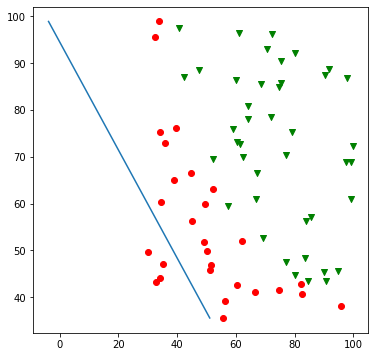

In [6]:
color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]
marker=['o','v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

plt.figure(figsize=(6, 6))
for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x,_y, c=c,marker=_m)

plt.plot((- linear.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - linear.intercept_[0]) / 
         linear.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))
plt.show()


## Fitting a logistic model 

In [7]:
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train[2].values.astype(int))


LogisticRegression()

In [8]:
### We can see from the results that the predicion from logistic regression are
### values which are 0 and 1

logit.predict(X_test) ## Predicted Values

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1])

In [9]:
y_test[2].values.astype(int) ## Actual Values

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

In [10]:
logit.intercept_[0]

-25.020783070324942

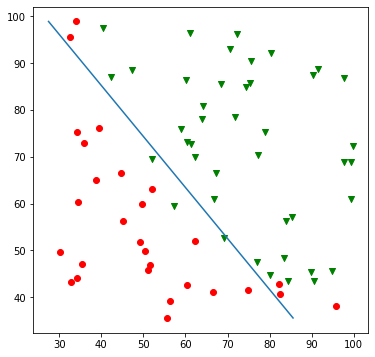

In [11]:
color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]
marker=['o','v']
y_marker = [marker[i] for i in y_train[2].values.astype(int)]

plt.figure(figsize=(6, 6))
for _m, c, _x, _y in zip(y_marker, y_color, X_train[0].values, X_train[1].values):
    plt.scatter(_x,_y, c=c,marker=_m)
    
plt.plot((- logit.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - logit.intercept_[0]) / 
         logit.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))
plt.show()
